<a href="https://colab.research.google.com/github/jthagar/Jay_INFO3020_Spring2020/blob/master/Final_Exam_jth0182.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Question 1

def printString(line):
    print(str(line))

content = input("please input a string:")
printString(content)

please input a string7568
7568


In [0]:
#Question 2:

def sum_evens():
    sum = 0
    #for-loop is not inclusive of the upper bound, thus 1000 becomes 1001
    for num in range(0,1001,2):
        sum += num
    return sum
print(sum_evens())

250500


In [0]:
#Question 3:

numbers = [12,10,3,2,[6,[7,8,9],19,21],21]

def list_product(listify):
    product = 1 # set to 1 since 0 * num = 0
    for entry in listify:
        if type(entry) == list:
            product *= list_product(entry) #recursion!
        else:
            product *= entry
    return product
print(list_product(numbers))

18243429120


In [0]:
#Question 4
import numpy as np

matrix=[[23,43,12],[32,12,52],[15,35,52],[19,28,56]]

def get_matrix(mat):
    new_mat = np.array(mat)
    new_mat[new_mat>20] = 0
    with open("result.txt","w") as wfile:
        wfile.write(str(new_mat)+"\n")
    return new_mat

print(get_matrix(matrix)) # the print is to make sure that the file is written with the correct matrix nums

[[ 0  0 12]
 [ 0 12  0]
 [15  0  0]
 [19  0  0]]


In [0]:
#Question 5: should work

numbers = [1,3,2,4,2,3,2,2,3,2,2,4,2,32,3,2,4,2,3,5,3,2,4,2,2,4,2,2,4,2,2,3,1,3,2,3]

def frequencies(num_list):
    nums = tuple(num_list)
    freq = {}
    for i in nums:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
    for num in freq:
        print(str(num) + " " + str(freq[num]))

frequencies(numbers)

1 2
3 9
2 17
4 6
32 1
5 1


In [0]:
#Question 6: 

class Point():
    x = 0
    y = 0
    
    def __init__(self,x = 0, y = 0): # 6.1
        self.x = x
        self.y = y
        
    def __str__(self):# 6.2
        return 'The Point is (' + str(self.x) + ',' + str(self.y) + ')'

    def __add__(self,other): # 6.3
        return Point(self.x+other.x,self.y+other.y)
    
p = Point(7,9)
q = Point(1,3)
print(p)
print(p+q)

The Point is (7,9)
The Point is (8,12)


In [0]:
#Question 7

import xlrd as excel

def sales_volume(name):
    
    food = excel.open_workbook(filename=name)
    sheet = food.sheet_by_name("Sheet1")
    
    food_data = []
    # col -> row order is to arrange the list into sales per food
    for col in range(sheet.ncols):
        data = []
        for row in range(sheet.nrows):
            data.append(sheet.cell(row,col).value)
        food_data.append(data)
    
    query = ""  #string to hold entries
    while(query != "0" and query != "exit"): #exit statement to finish loop
        for column in range(len(food_data)): # for-loop to print choices
            if(column == 0):
                print("0 exit")
            else:
                print(column,food_data[column][0])
        
        query = input("please input a number in the list:")
        if(query != "0" and query != "exit"):
            i = int(query)
            sum = 0 
            for entry in range(1,len(food_data[i])): # range omits the title
                sum += food_data[i][entry] # add all values together
            sum = int(sum) # sum goes from float to int
            print("the total sale of", food_data[i][0], "is", sum)
    
    

sales_volume("catering_sale_all.xls")



0 exit
1 chicken feet
2 steamed dumplings
3 ribs
4 full chicken
5 stuffed bun
6 flowering cabbage
7 doufu
8 chive dumplings
9 pudding
10 original cabbage
please input a number in the list:0


In [0]:
#Question 8

import pymysql

def connect_schema(root, passw, schema): # 8.2
    # I wanted to generalize the function so that
    # it could be used for more than a single schema,
    # assuming the mysql server is hosted locally
    
    db = pymysql.connect("localhost",root,passw,schema)
    cursor = db.cursor()
    return cursor

def calc_life_exp(cursor): # 8.3
    query = "select Continent, AVG(LifeExpectancy) from country group by Continent"
    cursor.execute(query)
    countries = cursor.fetchall()
    
    print("avglife | continent") # 8.4 
    for entry in range(len(countries)): # iterate through list
        print(countries[entry][1],"|",countries[entry][0]) # print
    
    
curse = connect_schema("root","password","world")
calc_life_exp(curse)


avglife | continent
72.99189 | North America
67.44118 | Asia
52.57193 | Africa
75.14773 | Europe
70.94615 | South America
69.71500 | Oceania
None | Antarctica


population by continent


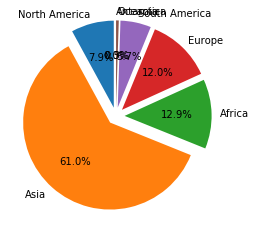

In [0]:
# Question 9

# 9.1 is redundant with Q8.2, so I'm going to use the same function
import pymysql
import pylab as pl

def connect_schema(root, passw, schema): # 9.1
    db = pymysql.connect("localhost",root,passw,schema)
    cursor = db.cursor()
    return cursor

def calc_pop(cursor): # 9.2
    query = "select Continent, SUM(Population) from country group by Continent"
    cursor.execute(query)
    counts = cursor.fetchall()
    
    ##################################### 9.3 section
    continent = []
    pops = []
    expl = []

    for entry in range(len(counts)):
        continent.append(counts[entry][0])
        pops.append(counts[entry][1])
        expl.append(0.1)
    
    print("population by continent")
    pl.pie(pops,labels=continent,explode=expl, autopct='%1.1f%%',startangle=90)
    ######################################
    
    
curse = connect_schema("root","password","world")

# I put both 9.2 and 9.3 in the same function as it seemed logical.
# Also part 3 did not specifically ask for a function so I had a bit
# more freedom of placement
calc_pop(curse)


please input a year between 1973 and 2014: 1978


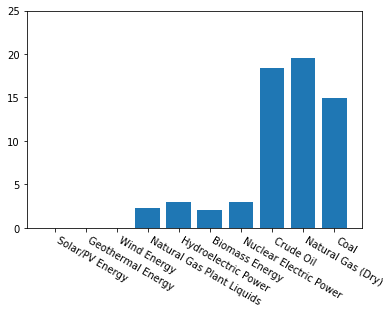

In [0]:
# Question 10

from pandas import *
import matplotlib.pyplot as mplot

energy = read_csv('energy-production.csv') # 10.1

def output_year(year): # 10.2
    index = (2014 - 1973) - (2014 - year)
    prod = energy.iloc[index]
    prod_dict = prod.to_dict()

    items = list(prod_dict.values())
    keys = list(prod_dict.keys())
    
    ######################################## 10.3
    mplot.ylim(0,25)# set limits of y-axis
    mplot.bar(keys[2:],items[2:]) # set the x-axis names and y-axis values
    mplot.xticks(rotation=-30, ha='left') # set x-axis tick rotation and placement
    mplot.show()
    ########################################
    
num = input("please input a year between 1973 and 2014: ")
output_year(int(num))